In [1]:
#%load_ext autoreload
#%autoreload 2

In [2]:
import os
import sys
import pickle 

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import numpy as np

import matplotlib.pyplot as plt

sys.path.append('..')

/kuacc/users/mbarin22/.conda/envs/mask2former/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from PIL import Image
from lang_sam import LangSAM

In [7]:
class Arguments:

    def __init__(self):
        
        self.project = 'mask2former4bev'
        self.model_name = 'mask2former4bev'
        self.dataset_path = '/datasets/nuscenes'
        self.version = 'trainval'

        # write all the parameters like above
        self.res_scale = 1
        self.H = 1600
        self.W = 900
        self.rand_crop_and_resize = 0
        
        self.resize_to = [224,400]
        self.crop_offset = 0
        self.random_flip = 0
        self.resize_lim = [1.0, 1.0]
        self.cams = ['CAM_FRONT_LEFT', 'CAM_FRONT', 'CAM_FRONT_RIGHT', 'CAM_BACK_LEFT', 'CAM_BACK', 'CAM_BACK_RIGHT']
        self.ncams = 6

        self.do_shuffle_cams = 0
        self.refcam_id = 1

        self.voxel_size = [200, 8, 200]
        self.bounds = [-50, 50, -5, 5, -50, 50]
        
        self.num_queries = 100
        self.get_sem_masks = 0
        
        
args = Arguments()

In [8]:
from dataset import NuScenesDatasetWrapper

datamodule = NuScenesDatasetWrapper(args)

Loading NuScenes version trainval from /datasets/nuscenes
Done loading NuScenes version trainval


In [9]:
valset = datamodule.val()
trainset = datamodule.train()

is_train False
is_train True


In [10]:
sample  = valset[0]

In [11]:
sample['images'].shape

torch.Size([6, 3, 224, 400])

In [17]:
langsam = LangSAM()

/kuacc/users/mbarin22/.conda/envs/mask2former/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1666642975312/work/aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


Model loaded from /kuacc/users/mbarin22/.cache/huggingface/hub/models--ShilongLiu--GroundingDINO/snapshots/a94c9b567a2a374598f05c584e96798a170c56fb/groundingdino_swinb_cogcoor.pth 
 => _IncompatibleKeys(missing_keys=[], unexpected_keys=['label_enc.weight', 'bert.embeddings.position_ids'])


In [45]:
langsam.device

device(type='cuda')

In [ ]:
from torchvision.transforms.functional import to_pil_image
image_pil = to_pil_image(sample['images'][0], 'RGB')

text_prompt = "vehicle"
masks = langsam.predict(image_pil, text_prompt)[0]

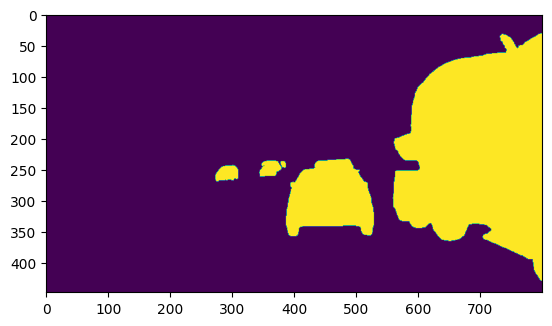

In [43]:
plt.imshow(cam_masks)

In [42]:
cam_masks = masks.sum(0)>0
np.savez(f'cam_masks_0.npz', masks=cam_masks) 

cam_masks = np.load(f'cam_masks_0.npz')['masks']

In [ ]:
import torch
from PIL import Image
from torchvision import transforms

def prepare_image(sem_mask):
    
    transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=3),  # Convert grayscale to pseudo-RGB
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize like ImageNet
    ])
    img = transform(img)
    return img.unsqueeze(0)  # Add batch dimension


In [26]:
cam_masks = np.load(f'cam_masks_0.npz')['masks']
cam_masks.shape

(448, 800)

In [21]:
from torchvision import transforms

transform = transforms.Compose([
            transforms.Grayscale(num_output_channels=3),  # Convert grayscale to pseudo-RGB
        ])
img = transform(cam_masks.unsqueeze(0).unsqueeze(0))
        

In [27]:
from torchvision.transforms.functional import to_pil_image
image_pil = to_pil_image(cam_masks.unsqueeze(0), 'RGB')

AttributeError: 'numpy.ndarray' object has no attribute 'unsqueeze'